# Ford GoBike System Data Analysis
## by Francis Wesa Wobulu

## Investigation Overview

In this investigation, I looked at how the duration of trips changes with respect to DateTime and user type. I also looked at the distibution of the bike rides and their gender. The main focus was on hours of the day, days of the week and customer type


## Dataset Overview

The dataset consists of information regarding approximately 183,412 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, user_type, and member_gender, as well as additional variables such as member's year of birth, start and end station name, start and end station longitude and latitude among others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('bike_clean.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_group,month,start_day,hour,date
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,38.0,middle_age,February,Thursday,17,2019-02-28
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,50.0,middle_age,February,Thursday,12,2019-02-28
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,33.0,young,February,Thursday,17,2019-02-28
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,48.0,middle_age,February,Thursday,23,2019-02-28
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,63.0,senior,February,Thursday,23,2019-02-28


## Distribution of Bike Rides among User Type

- Subscribers account for the hihest number of Bike rides taken.

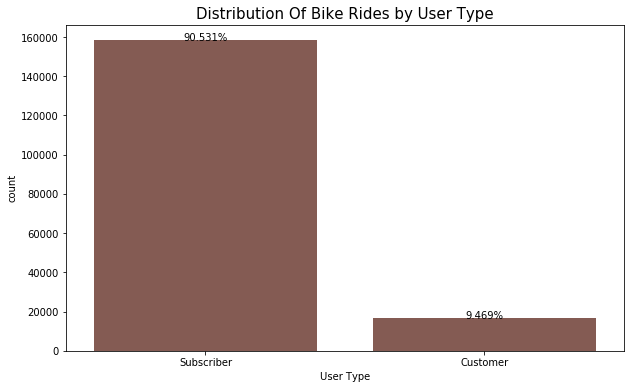

In [29]:
plt.figure(figsize=(10,6))
ax = sb.countplot(data = bike_data, x = 'user_type',  color=sb.color_palette()[5], order=bike_data.user_type.value_counts().index)

total = len(bike_data)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.title('Distribution Of Bike Rides by User Type', fontsize=15);

### Distribution of Bike trips based on the Day of the week

- Most trips were taken between Monday and Friday with Thursday having the highest number of trips taken.
- Sunday and Sartuday recorded a low number of trips

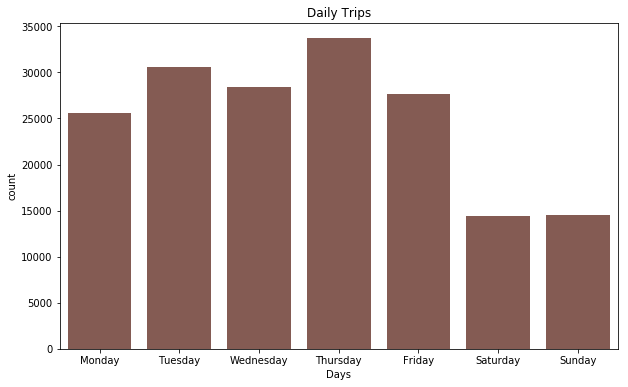

In [15]:
plt.figure(figsize=(10,6))

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.title('Daily Trips')
sb.countplot(data = bike_data, x = 'start_day', order=day_name, color = sb.color_palette()[5])
plt.xlabel('Days');

## Distribution of Bike trips based on the Time of Day

- The ditribution above shown by the frequency of bike trips during the day is bimodal.
- There is peak bike rides between 8 and 9 in the morning and between 5 and 6 in the evening

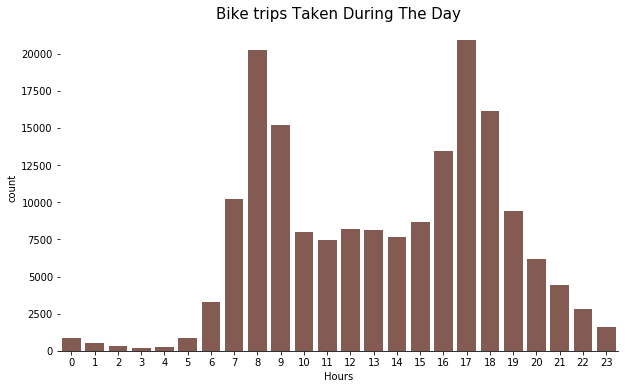

In [28]:
#Based on the hour of day
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike trips Taken During The Day', fontsize=15)
ax = sb.countplot(data=bike_data, x='hour', order=hour_order, color=sb.color_palette()[5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.yticks([])
#plt.ylabel('')
plt.xlabel('Hours');

## Bike Ride distribution based on gender

- Most of the Bike Trips were taken by Males

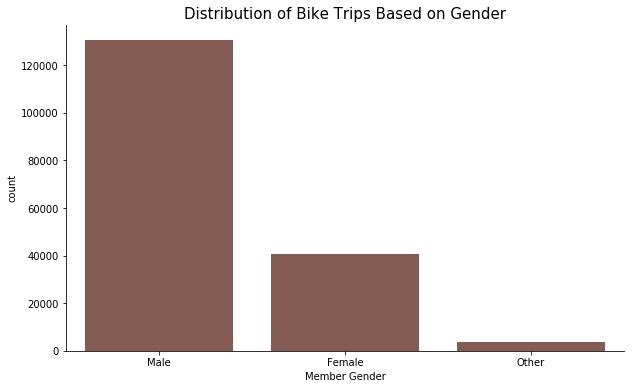

In [20]:
#Distribution of Bike Trips based on The Member_gender
plt.figure(figsize=(10,6))
plt.title('Distribution of Bike Trips Based on Gender', fontsize=15)
ax = sb.countplot(data = bike_data, x = 'member_gender', color = sb.color_palette()[5], order=bike_data.member_gender.value_counts().index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.xlabel('Member Gender');

### Comparison of rides taken by member_gender at various times of the day
- Females took the least number of rides during early mornings and late at night.
- Males generally are the largest group of bike riders throughout the day

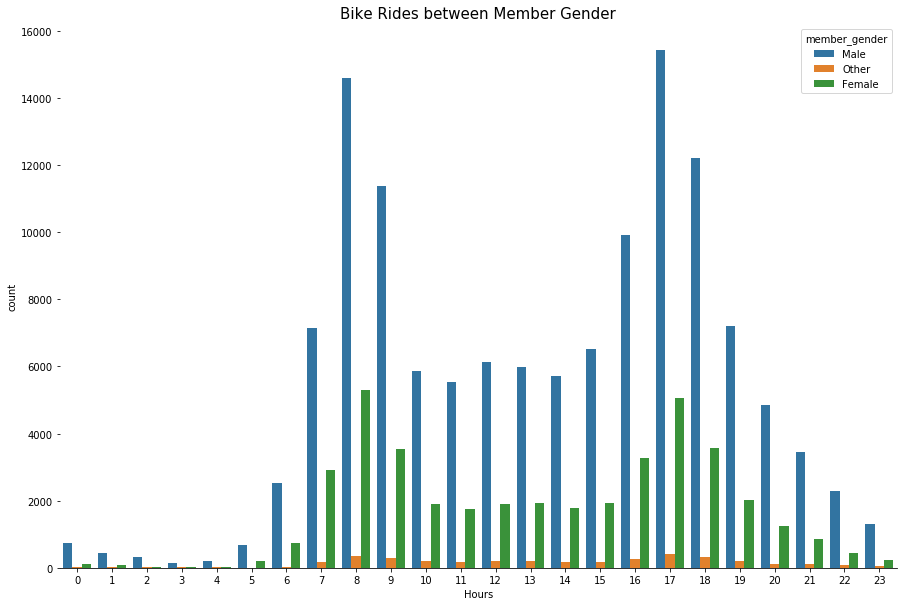

In [27]:
#plot chart

plt.figure(figsize=(15,10))
plt.title('Bike Rides between Member Gender', fontsize=15)
ax = sb.countplot(data = bike_data, x = 'hour', hue = 'member_gender')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.yticks([])
#plt.ylabel('')
plt.xlabel('Hours');
plt.xticks();

## comparison of bike usage among user type during the day

- A lot of bike rides were taken by subscibers compared to customers

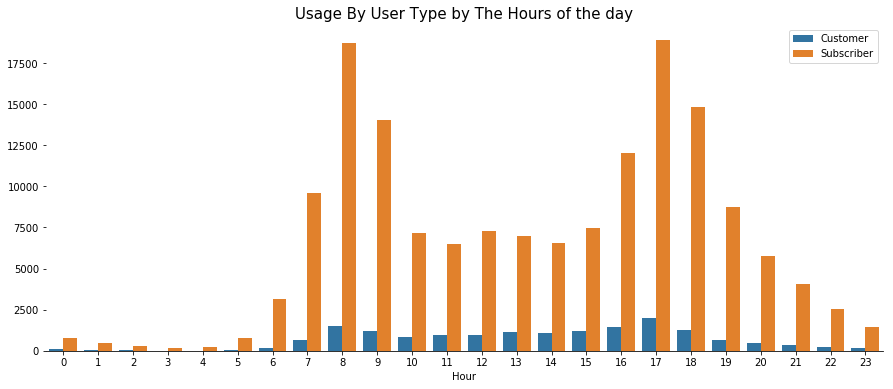

In [17]:
plt.figure(figsize=(15,6))
plt.title('Usage By User Type by The Hours of the day', fontsize=15)
chart = sb.countplot(data=bike_data, x='hour', hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 390628 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 